### Описание исследования

Вы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. 
Предполагается привлечение инвесторов.
Необходимо провести исследование рынка в сфере общественного питания по определению перспектив развития проекта для привлечения инвесторов.

### Загрузка данных и подготовка к анализу

In [1]:
import pandas as pd # загрузка библиотек
import seaborn as sns
import plotly.express as px 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!pip install plotly

In [3]:
rest_data = pd.read_csv('/datasets/rest_data.csv') # таблица данных о заведениях общественного питания в г. Москва
rest_data.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


id — идентификатор объекта;
object_name — название объекта общественного питания;
chain — сетевой ресторан;
object_type — тип объекта общественного питания;
address — адрес;
number — количество посадочных мест


In [4]:
rest_data.isna().sum() # проверка пропусков

id             0
object_name    0
chain          0
object_type    0
address        0
number         0
dtype: int64

In [5]:
rest_data.info() # общая информация о данных таблицы

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [6]:
rest_data.drop_duplicates() # удаление дубликатов

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36


In [7]:
rest_data.drop_duplicates(subset=['object_name','object_type', 'address', 'number'], inplace=True) # удаление дубликатов

In [8]:
rest_data.info() # общая информация о данных таблицы

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15284 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15284 non-null  int64 
 1   object_name  15284 non-null  object
 2   chain        15284 non-null  object
 3   object_type  15284 non-null  object
 4   address      15284 non-null  object
 5   number       15284 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 835.8+ KB


Вывод: в таблице представлены данные о заведениях общественного питания в Москве. Типы данных в колонках правильные, пропуски и дубликаты отсутствуют. Можно приступать к анализу данных.

### Анализ данных

#### Исследуйте соотношение видов объектов общественного питания по количеству. Постройте график.

In [9]:
rest_data['object_type'].unique() # виды объектов общественного питания

array(['кафе', 'столовая', 'закусочная',
       'предприятие быстрого обслуживания', 'ресторан', 'кафетерий',
       'буфет', 'бар', 'магазин (отдел кулинарии)'], dtype=object)

In [10]:
rest_data.groupby('object_type')['object_type'].count().sort_values() # виды объектов общественного питания и их количество

object_type
магазин (отдел кулинарии)             273
закусочная                            349
кафетерий                             395
буфет                                 577
бар                                   855
предприятие быстрого обслуживания    1898
ресторан                             2282
столовая                             2584
кафе                                 6071
Name: object_type, dtype: int64

Больше всего представлены кафе, столовые, рестораны, предприятие быстрого обслуживания.

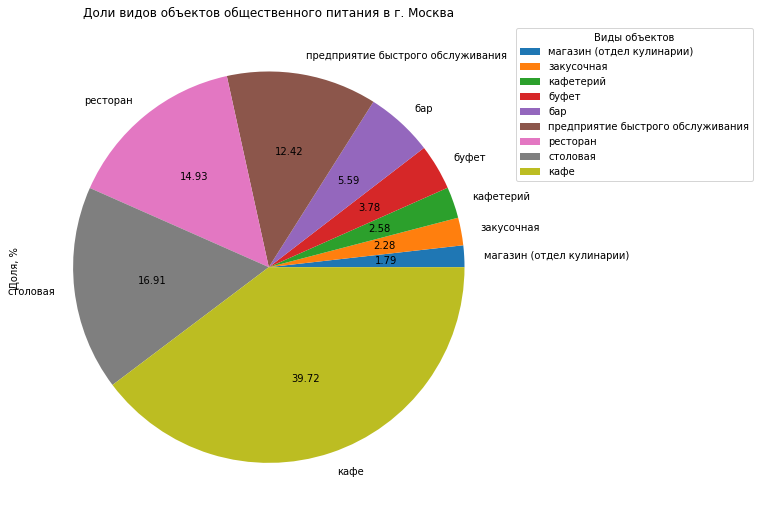

In [11]:
rest_data.groupby('object_type')['object_type'].count().sort_values().plot(kind='pie', label='Доля, %', autopct='%.2f', figsize= (9,9))
sns.set_palette('bright')
plt.title("Доли видов объектов общественного питания в г. Москва")
plt.legend(title="Виды объектов", loc="best", bbox_to_anchor=(1.0, 0, 0.5, 1))
plt.show()

Соотношение долей разных типов объектов общественного питания: 40%-кафе, 17%-столовых, 15%- ресторанов, 13% -предприятий быстрого обслуживания.

#### Исследуйте соотношение сетевых и несетевых заведений по количеству. Постройте график.

In [12]:
rest_data.groupby('chain')['id'].count().sort_values() # количество сетевых и несетевых заведений

chain
да      2964
нет    12320
Name: id, dtype: int64

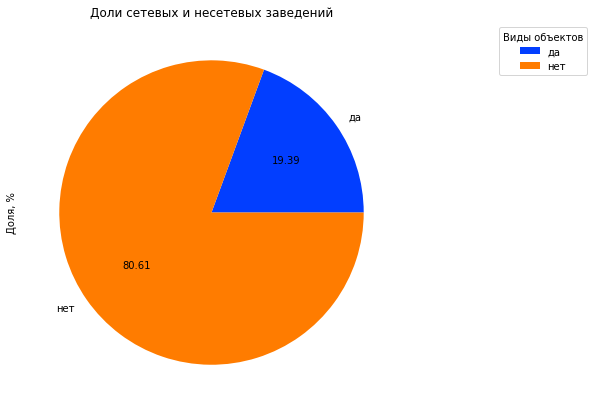

In [13]:
rest_data.groupby('chain')['id'].count().sort_values().plot(kind='pie', label='Доля, %', autopct='%.2f', figsize= (7,7))
sns.set_palette('bright')
plt.title("Доли сетевых и несетевых заведений")
plt.legend(title="Виды объектов", loc="best", bbox_to_anchor=(1.0, 0, 0.5, 1))
plt.show()

Доля несетевых объектов питания составляет 81%, доля сетевых объектов питания составляет 19%.

#### Для какого вида объекта общественного питания характерно сетевое распространение?

In [14]:
rest_data.query('chain == "да"').groupby('object_type')['object_type'].count()

object_type
бар                                    37
буфет                                  11
закусочная                             56
кафе                                 1396
кафетерий                              52
магазин (отдел кулинарии)              78
предприятие быстрого обслуживания     788
ресторан                              543
столовая                                3
Name: object_type, dtype: int64

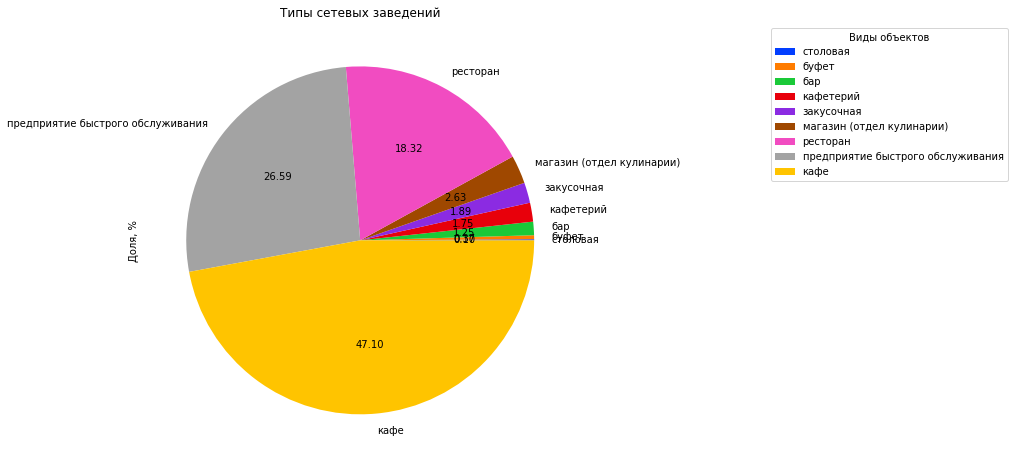

In [15]:
rest_data.query('chain == "да"').groupby('object_type')['object_type'].count().sort_values().plot(kind='pie', label='Доля, %', autopct='%.2f', figsize= (8,8))
sns.set_palette('bright')
plt.title("Типы сетевых заведений")
plt.legend(title="Виды объектов", loc="best", bbox_to_anchor=(1.5, 0, 0.5, 1))
plt.show()

Исходя из графика можно сделать вывод, что сетевое распределение характерно для в большей степени для кафе.

#### Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

In [16]:
rest_data.query('chain == "да"').groupby('object_name')['number'].mean().sort_values()

object_name
Кофе с Собой                    0.0
Пицца «Паоло»                   0.0
Marmalato                       0.0
Movenpick                       0.0
My box                          0.0
                              ...  
Кафе МУ-МУ                    300.0
Ян Примус                     300.0
Чешская пивная «Козловица»    306.0
БАКИНСКИЙ БУЛЬВАР             350.0
Темпл Бар                     356.0
Name: number, Length: 724, dtype: float64

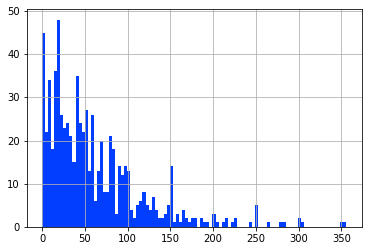

In [17]:
rest_data.query('chain == "да"').groupby('object_name')['number'].mean().sort_values().hist(bins=100)
plt.show()

По гистограмме видно, что для сетевых заведений характерно много заведений с малым количеством посадочных мест. 

#### Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.

In [18]:
rest_data.groupby('object_type')['number'].mean().sort_values()

object_type
магазин (отдел кулинарии)              5.589744
закусочная                             7.825215
кафетерий                              9.184810
предприятие быстрого обслуживания     20.808219
кафе                                  39.785703
бар                                   43.533333
буфет                                 51.509532
ресторан                              96.884750
столовая                             130.337848
Name: number, dtype: float64

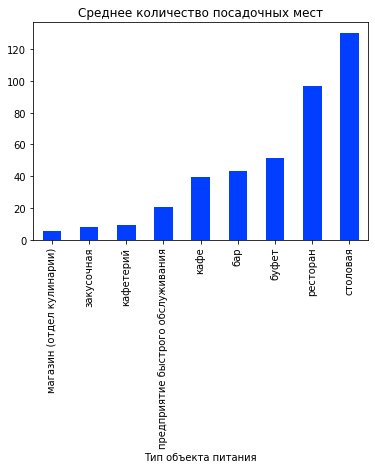

In [19]:
rest_data.groupby('object_type')['number'].mean().sort_values().plot(kind='bar', xlabel = 'Тип объекта питания')
sns.set_palette('bright')
plt.title("Среднее количество посадочных мест")

plt.show()

В среднем самое больше количество посадочных мест в столовых.

#### Выделите в отдельный столбец информацию об улице из столбца address .

In [20]:
# зададим функцию для выделения улицы из столбца адрес с помощью функции split
def add_street(data):
    x = data.split(',')
    x[1]=x[1].strip() 
    street=x[1]
    return street

In [21]:
rest_data['street']= rest_data['address'].apply(add_street) #применим фунцию def add_street к таблице
rest_data.head(10)

,id,object_name,chain,object_type,address,number,street
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица
5,27429,СТОЛ. ПРИ ГОУ СОШ № 1051,нет,столовая,"город Москва, Абрамцевская улица, дом 15, корп...",240,Абрамцевская улица
6,148815,Брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10,переулок Сивцев Вражек
7,20957,Буфет МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",90,Авиамоторная улица
8,20958,КПФ СЕМЬЯ-1,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",150,Авиамоторная улица
9,28858,Столовая МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",120,Авиамоторная улица


#### Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

Для определения к какому району относятся улицы с расположенными на них заведениями общественного питания, загрузим таблицу с сайта-портала города Москва.

In [22]:
from io import BytesIO
import requests
spreadsheet_id = '2PACX-1vRssRwOlX5hGfXEdxVoE8JyKpEcyeeJiVnlKf_ldMGy3I6njQQ6Ib-u16LteeCLkK9K-fyqaZHDhsVc'
file_name = 'https://docs.google.com/spreadsheets/d/e/{}/pub?gid=966861757&single=true&output=csv'.format(spreadsheet_id)
r = requests.get(file_name)
df = pd.read_csv(BytesIO(r.content))
df.head()

,ID,Name,global_id,IsNetObject,OperatingCompany,TypeObject,AdmArea,district,address,PublicPhone,...,AdmArea_en,District_en,Address_en,PublicPhone_en,SeatsCount_en,SocialPrivileges_en,Longitude_WGS84_en,Latitude_WGS84_en,geodata_center,geoarea
0,Код,Наименование,global_id,Является сетевым,Название управляющей компании,Вид объекта,Административный округ по адресу,Район,Адрес,Контактный телефон,...,AdmArea_en,District_en,Address_en,PublicPhone_en,SeatsCount_en,SocialPrivileges_en,Longitude_WGS84_en,Latitude_WGS84_en,geodata_center,geoarea
1,00151635,СМЕТАНА,637376221,нет,NaN,кафе,Северо-Восточный административный округ,Ярославский район,"город Москва, улица Егора Абакумова, дом 9",PublicPhone:(499) 183-14-10\n\n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""coordinates"":[37.714565000436,55.87900153130...",NaN
2,000077874,Родник,637376331,нет,NaN,кафе,Центральный административный округ,Таганский район,"город Москва, улица Талалихина, дом 2/1, корпус 1",PublicPhone:(495) 676-55-35\n\n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""coordinates"":[37.6733061300344,55.7382386551...",NaN
3,000024309,Кафе «Академия»,637376349,нет,NaN,ресторан,Центральный административный округ,Таганский район,"Российская Федерация, город Москва, внутригоро...",PublicPhone:(495) 662-30-10\n\n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,000027429,ГБОУ «Школа № 1430 имени Героя Социалистическо...,637376480,нет,NaN,столовая,Северо-Восточный административный округ,район Лианозово,"город Москва, Угличская улица, дом 17",PublicPhone:(499) 908-06-15\n\n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""coordinates"":[37.56694,55.9040188006692],""ty...",NaN


In [23]:
df_1=df.loc[:,['district','address']] # определим новую таблицу с нужными столбцами: адрес и район.

In [24]:
df_1.head()

,district,address
0,Район,Адрес
1,Ярославский район,"город Москва, улица Егора Абакумова, дом 9"
2,Таганский район,"город Москва, улица Талалихина, дом 2/1, корпус 1"
3,Таганский район,"Российская Федерация, город Москва, внутригоро..."
4,район Лианозово,"город Москва, Угличская улица, дом 17"


In [25]:
data = rest_data.merge(df_1, on='address', how='inner') # объедимим таблицы по столбцу адрес

In [26]:
data.head() # таблица с добавленными районами 

,id,object_name,chain,object_type,address,number,street,district
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова,Ярославский район
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина,Таганский район
2,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица,район Лианозово
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица,район Лианозово
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица,район Лианозово


In [27]:
data = data.drop_duplicates() # удалим дубликаты

In [28]:
data.info() #запрос информации о новой таблице

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12225 entries, 0 to 79093
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           12225 non-null  int64 
 1   object_name  12225 non-null  object
 2   chain        12225 non-null  object
 3   object_type  12225 non-null  object
 4   address      12225 non-null  object
 5   number       12225 non-null  int64 
 6   street       12225 non-null  object
 7   district     12225 non-null  object
dtypes: int64(2), object(6)
memory usage: 859.6+ KB


Выделим топ-10 улиц по количеству заведений.

In [29]:
top10_street= rest_data.groupby('street')['id'].count().sort_values(ascending = False).head(12)


In [30]:
top10_street # список улиц с наибольшим количеством заведений питания

street
город Зеленоград          232
проспект Мира             204
Профсоюзная улица         181
Ленинградский проспект    170
Пресненская набережная    167
Варшавское шоссе          161
Ленинский проспект        147
поселение Сосенское       137
проспект Вернадского      128
Кутузовский проспект      114
Каширское шоссе           111
Кировоградская улица      108
Name: id, dtype: int64

Удалим из списка город Зеленоград и поселение Сосенское

In [31]:
top10_street = top10_street.drop(top10_street.index[0])
top10_street = top10_street.drop(top10_street.index[6])

In [32]:
top10_street # топ-10 улиц с наибольшим количеством заведений питания

street
проспект Мира             204
Профсоюзная улица         181
Ленинградский проспект    170
Пресненская набережная    167
Варшавское шоссе          161
Ленинский проспект        147
проспект Вернадского      128
Кутузовский проспект      114
Каширское шоссе           111
Кировоградская улица      108
Name: id, dtype: int64

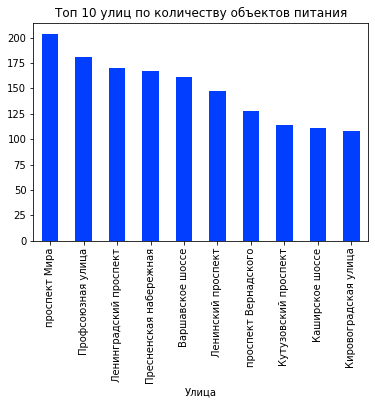

In [33]:
top10_street.plot(kind='bar', xlabel = 'Улица') # график распределения количества объектов питания по улицам
plt.title("Топ 10 улиц по количеству объектов питания")
plt.show()

Создадим отдельный список с улицами, на которых больше всего заведений питания

In [34]:
list_street= ['проспект Мира',
              'Профсоюзная улица',
              'Ленинградский проспект',
              'Пресненская набережная',
              'Варшавское шоссе',
              'Ленинский проспект',
              'проспект Вернадского',
              'Кутузовский проспект',
              'Каширское шоссе',
              'Кировоградская улица']     
 
# с помощью цикла определим к каким район относятся улицы топ-10
for i in list_street:
    print(i, '. Районы, в которые входит эта улица:', 
          data.query(f'street == "{i}"')['district'].unique())
    


проспект Мира . Районы, в которые входит эта улица: ['Мещанский район' 'Останкинский район' 'Алексеевский район'
 'район Свиблово' 'район Ростокино']
Профсоюзная улица . Районы, в которые входит эта улица: ['Академический район' 'район Черёмушки' 'район Тёплый Стан'
 'район Коньково' 'Обручевский район' 'район Ясенево']
Ленинградский проспект . Районы, в которые входит эта улица: ['район Беговой' 'район Аэропорт' 'район Сокол' 'Хорошёвский район']
Пресненская набережная . Районы, в которые входит эта улица: ['Пресненский район']
Варшавское шоссе . Районы, в которые входит эта улица: ['Донской район' 'Нагорный район' 'район Чертаново Южное'
 'район Чертаново Центральное' 'район Чертаново Северное'
 'район Нагатино-Садовники' 'район Южное Бутово']
Ленинский проспект . Районы, в которые входит эта улица: ['район Якиманка' 'Донской район' 'Гагаринский район'
 'Ломоносовский район' 'Обручевский район' 'район Тропарёво-Никулино'
 'район Тёплый Стан' 'район Проспект Вернадского']
проспект Вер

In [35]:
top10_street.values

array([204, 181, 170, 167, 161, 147, 128, 114, 111, 108])

#### Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

In [36]:
one_object=data.pivot_table(index = 'street', values = 'id', aggfunc='count').sort_values(by='id') # данные по количеству объектов питания с рапределением по улицам  
one_object

,id
street,
Попутная улица,1
Турчанинов переулок,1
Угличская улица,1
Уланский переулок,1
Уржумская улица,1
...,...
Кутузовский проспект,145
Профсоюзная улица,158
Пресненская набережная,167


In [37]:
print('Число улиц с одним объектом общественного питания',one_object.query('id==1')['id'].count())

Число улиц с одним объектом общественного питания 510


In [38]:
one_list =one_object.query('id==1').index # список улиц с одним объектом общественного питания 
one_list 

Index(['Попутная улица', 'Турчанинов переулок', 'Угличская улица',
       'Уланский переулок', 'Уржумская улица', 'Утренняя улица',
       'Федоскинская улица', 'Феодосийская улица', 'Доброслободская улица',
       'Филипповский переулок',
       ...
       'Берниковская набережная', 'улица Дубки', 'улица Дениса Давыдова',
       'улица Демьяна Бедного', 'улица Говорова', 'улица Девятая Рота',
       'улица Госпитальный Вал', '1-я Боевская улица', 'Библиотечная улица',
       'улица Достоевского'],
      dtype='object', name='street', length=510)

In [ ]:
one_area = []
for i in one_list:
    
    area = data[data['street'] == i]['district'].unique()
    if area not in one_area:
        one_area.append(area)

uniq_one = []
for row in one_area:
    for elem in row:
        if elem not in uniq_one:
            uniq_one.append(elem)
print('Список районов г. Москвы, к которым относятся улицы с одним объектом общественного питания :', uniq_one)            
        
      

#### Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?

In [ ]:
number_top = data.query('street == @list_street') # данные по улицам топ-10
number_top

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


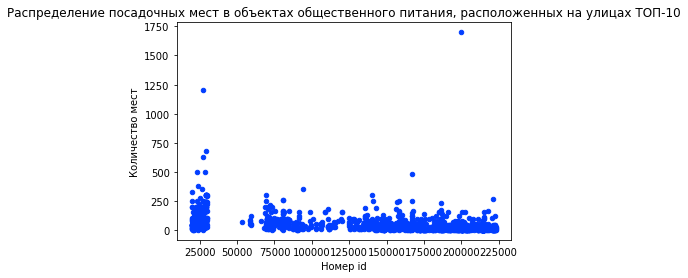

In [47]:
number_top.plot(kind='scatter', x='id', y = 'number') 
plt.title("Распределение посадочных мест в объектах общественного питания, расположенных на улицах ТОП-10")
plt.ylabel("Количество мест")
plt.xlabel("Номер id")
plt.show()           # вывод диаграммы рассеяния с количествами посадочных мест в заведениях с улиц топ-10


Исходя из диаграммы рассеяния, большинство объектов общественного питания имеют около 250 посадочных мест. Для построения графиков распределения сделаем срез, ограничим количество посадочных мест до 250.

In [ ]:
number_250=number_top[number_top['number'] < 250] # срез по количеству посадочных мест

number_250.boxplot(column='number', by='street', color='blue') # графики распределения 
plt.title("Распределение посадочных мест в заведения на улицах топ-10")
plt.xlabel("Улица топ-10")
plt.ylabel("Количество посадочных мест")
plt.xticks(rotation=90)
plt.show()



Исходя из графиков распределения можно сделать вывод, что большинство заведений на улицах с большим количеством мест общественного питания имеют в среднем до 50 посадочных мест.

### Общий вывод и рекомендации.

На данный момент рынок общественного питания представлен в основном кафе, столовыми, предприятиями быстрого обслуживания и ресторанами. На центральных улицах города большая конкуренция, так как на них высокая концентрация объектов питания. Среднее количество посадочных мест в данных заведениях не более 50. Сетевых заведений существенно меньше, чем несетевых.

Рекомендации для кафе с роботами:

1. Возможно стоит пересмотреть тип заведения и открыть предприятие быстрого обслуживания, так как в данном типе конкуренция меньше, чем среди кафе.

2. Небольшое количество посадочных мест от 20 до 50, позволит разместить всех желающих при открытии, и при этом не потерять на аренде помещения в последующем, когда количество посетителей уменьшится, в связи со снижением ажиотажа.

3. Арендовать помещение на улицах с малым количеством заведений общественного питания.

4. В перспективе развития: сеть предприятий быстрого обслуживания с размещением на улицах с малым количеством объектов общественного питания.

### Презентация

Презентация : <https://drive.google.com/file/d/1AVp4JJDerm5fScVDiUfuc4_B3h5NBODV/view?usp=sharing>